<a href="https://colab.research.google.com/github/nicha1997/Disseration-Project/blob/main/Foundational_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 1: Foundational Data Preparation**

## **Step 1.1: Final Data Cleaning & Preprocessing**

In [ ]:
import pandas as pd

# load Excel file
df = pd.read_excel('RAW Data.xlsx')

# Convert blanks and whitespaces to NaN
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# Check missing values again
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent
})

print("Missing values summary for all columns:")
print(missing_summary)


Missing values summary for all columns:
                     Missing Count  Missing Percent (%)
Company_Ticker                   0             0.000000
Company_Name                     0             0.000000
Country                          0             0.000000
BICS_Industry_Group              0             0.000000
BICS_Industry                    0             0.000000
...                            ...                  ...
Gov_Disc_Sc_2020              2078            75.153707
Gov_Disc_Sc_2021              1982            71.681736
Gov_Disc_Sc_2022              1980            71.609403
Gov_Disc_Sc_2023              2060            74.502712
Gov_Disc_Sc_2024              2587            93.562387

[192 rows x 2 columns]


In [ ]:
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
Company_Ticker         object
Company_Name           object
Country                object
BICS_Industry_Group    object
BICS_Industry          object
                        ...  
Gov_Disc_Sc_2020       object
Gov_Disc_Sc_2021       object
Gov_Disc_Sc_2022       object
Gov_Disc_Sc_2023       object
Gov_Disc_Sc_2024       object
Length: 192, dtype: object


In [ ]:
print("Detailed info of the DataFrame:")
df.info()


Detailed info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Columns: 192 entries, Company_Ticker to Gov_Disc_Sc_2024
dtypes: float64(32), object(160)
memory usage: 4.1+ MB


In [ ]:
# Define years and Financial indicator names
years = [str(y) for y in range(2017, 2025)]
indicators = ['Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days',
              'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur',
              'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio']

# To collect complete company-year data (with indicator values)
complete_data_records = []

# Loop over each year
for year in years:
    # Build list of column names for this year
    cols_this_year = [f"{indicator}_{year}" for indicator in indicators]

    # Drop rows with any missing in these columns
    complete_rows = df.dropna(subset=cols_this_year).copy()

    # Add 'Year' column
    complete_rows['Year'] = int(year)

    # Keep only identifying columns + the indicator columns for this year
    selected_cols = ['Company_Ticker', 'Company_Name', 'Country', 'BICS_Industry_Group', 'BICS_Industry', 'BICS_Sub_Industry', 'Year'] + cols_this_year
    complete_data_records.append(complete_rows[selected_cols])

# Combine all complete records
final_complete_df = pd.concat(complete_data_records, ignore_index=True)

# Save to Excel
final_complete_df.to_excel("Financial_Complete_Data.xlsx", index=False)

# Download in Colab
from google.colab import files
files.download("Financial_Complete_Data.xlsx")

print("Processing complete! 'Financial_Complete_Data.xlsx' has been created.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing complete! 'Financial_Complete_Data.xlsx' has been created.


In [ ]:
# Define years and ESG indicator names
years = [str(y) for y in range(2017, 2025)]
esg_indicators = [
    'ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc'
]

# To collect complete (Company, Year) ESG records
complete_esg_data = []

# Loop over each year
for year in years:
    # Generate column names for this year
    cols_this_year = [f"{indicator}_{year}" for indicator in esg_indicators]

    # Drop rows with any missing ESG data for this year
    complete_rows = df.dropna(subset=cols_this_year).copy()

    # Add Year column
    complete_rows["Year"] = int(year)

    # Keep only identifier + that year's ESG columns
    selected_cols = ['Company_Ticker', 'Company_Name', 'Country', 'BICS_Industry_Group', 'BICS_Industry', 'BICS_Sub_Industry', 'Year'] + cols_this_year
    complete_esg_data.append(complete_rows[selected_cols])

# Combine all complete ESG rows
final_esg_df = pd.concat(complete_esg_data, ignore_index=True)

# Export to Excel
final_esg_df.to_excel("ESG_Complete_Data.xlsx", index=False)

# Download file in Colab
from google.colab import files
files.download("ESG_Complete_Data.xlsx")

print("Processing complete! 'ESG_Complete_Data.xlsx' has been created.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing complete! 'ESG_Complete_Data.xlsx' has been created.


In [ ]:
import pandas as pd
import numpy as np

# Load data
financial_df = pd.read_excel("Financial_Complete_Data.xlsx")
raw_df = pd.read_excel('RAW Data.xlsx')

# Clean blanks
raw_df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# These columns will be used to identify unique rows and for merging.
id_cols = [
    'Company_Ticker', 'Company_Name', 'Country',
    'BICS_Industry_Group', 'BICS_Industry', 'BICS_Sub_Industry'
]

# Define years and indicators
years = [str(y) for y in range(2017, 2025)]
financial_indicators = ['Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days',
                        'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur',
                        'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio']
esg_indicators = ['ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc']

# Include all id_cols and 'Year' in the 'i' parameter to keep them.
financial_long = pd.wide_to_long(financial_df,
                                 stubnames=financial_indicators,
                                 i=id_cols + ['Year'],
                                 j='temp_year',
                                 sep='_',
                                 suffix='\\d+').reset_index()

# Drop rows where year mismatch occurred (a result of wide_to_long)
financial_long = financial_long[financial_long['Year'] == financial_long['temp_year']]
financial_long.drop(columns='temp_year', inplace=True)

# Include id_cols when selecting data for each year from the raw file.
esg_records = []
for year in years:
    # Get the ESG columns for the specific year
    esg_cols_this_year = [f"{col}_{year}" for col in esg_indicators]

    # Select the base identifiers + the year-specific ESG columns
    df_subset = raw_df[id_cols + esg_cols_this_year].copy()

    # Set the 'Year' for this subset
    df_subset['Year'] = int(year)

    # Rename ESG columns to be generic (e.g., 'ESG_Disc_Score_2020' -> 'ESG_Disc_Score')
    df_subset.rename(columns={f"{col}_{year}": col for col in esg_indicators}, inplace=True)

    esg_records.append(df_subset)

esg_flat = pd.concat(esg_records, ignore_index=True)

# Define the columns to merge on, which is all identifiers plus the Year
merge_on_cols = id_cols + ['Year']

# Option 1: Keep only complete Financial & ESG rows
complete_esg = esg_flat.dropna(subset=esg_indicators)
merged_option1 = pd.merge(financial_long, complete_esg, on=merge_on_cols, how='inner')

# Option 2: Keep complete financial, join ESG and add flag columns
merged_option2 = pd.merge(financial_long, esg_flat, on=merge_on_cols, how='left')

# Add binary flags for ESG presence
for col in esg_indicators:
    merged_option2[f"{col}_Flag"] = np.where(merged_option2[col].notna(), 1, 0)

# Export both files
option1_path = "File1_Final_Financial_With_ESG.xlsx"
option2_path = "File2_Final_Financial_With_ESG_Flags.xlsx"
merged_option1.to_excel(option1_path, index=False)
merged_option2.to_excel(option2_path, index=False)

print("Processing complete! Files have been created.")
print(f"File 1 saved to: {option1_path}")
print(f"File 2 saved to: {option2_path}")

print("\n--- Option 1: Financial + ESG (Inner Join) ---")
display(merged_option1.head())

print("\n--- Option 2: Financial + ESG Flags (Left Join) ---")
display(merged_option2.head())


Processing complete! Files have been created.
File 1 saved to: File1_Final_Financial_With_ESG.xlsx
File 2 saved to: File2_Final_Financial_With_ESG_Flags.xlsx

--- Option 1: Financial + ESG (Inner Join) ---


,Company_Ticker,Company_Name,Country,BICS_Industry_Group,BICS_Industry,BICS_Sub_Industry,Year,Revenue,GM,ROA,...,EBIT,Int_Exp,Int_Cov_Ratio,CFO,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc
0,FLO US Equity,FLOWERS FOODS INC,United States,Consumer Staple Products,Food,Packaged Food,2017,3.045199e+09,48.7475,5.5387,...,1.250496e+08,2.839350e+07,4.404164,2.309794e+08,6.153771e+08,0.375346,44.2511,33.2226,14.3894,84.9789
1,MDLZ US Equity,MONDELEZ INTERNATIONAL INC-A,United States,Consumer Staple Products,Food,Packaged Food,2017,2.011320e+10,38.7473,4.5432,...,2.688905e+09,2.881524e+08,9.331537,2.013960e+09,1.305235e+10,0.154299,56.6643,39.9577,36.1548,93.7387
2,EPC US Equity,EDGEWELL PERSONAL CARE CO,United States,Consumer Staple Products,Household Products,Personal Care Products,2017,1.814997e+09,48.9863,0.1272,...,-8.686461e+05,5.464574e+07,-0.015896,2.476431e+08,1.153266e+09,0.214732,49.0695,41.1356,18.4401,87.4774
3,NUS US Equity,NU SKIN ENTERPRISES INC - A,United States,Consumer Staple Products,Household Products,Personal Care Products,2017,1.770156e+09,77.9703,8.4491,...,2.131885e+08,1.724254e+07,12.364099,2.349918e+08,2.873632e+08,0.817752,39.4729,15.6146,17.6542,84.9789
4,UNFI US Equity,UNITED NATURAL FOODS INC,United States,Retail & Wholesale - Staples,Wholesale - Consumer Staples,Food & Beverage Wholesalers,2017,7.323941e+09,15.4070,4.5360,...,1.784893e+08,1.351472e+07,13.207023,2.217255e+08,2.938599e+08,0.754528,37.3604,7.0371,17.3821,87.4774



--- Option 2: Financial + ESG Flags (Left Join) ---


,Company_Ticker,Company_Name,Country,BICS_Industry_Group,BICS_Industry,BICS_Sub_Industry,Year,Revenue,GM,ROA,...,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,ESG_Disc_Score_Flag,Env_Disc_Sc_Flag,Soc_Disc_Sc_Flag,Gov_Disc_Sc_Flag
0,FLO US Equity,FLOWERS FOODS INC,United States,Consumer Staple Products,Food,Packaged Food,2017,3.045199e+09,48.7475,5.5387,...,6.153771e+08,0.375346,44.2511,33.2226,14.3894,84.9789,1,1,1,1
1,MDLZ US Equity,MONDELEZ INTERNATIONAL INC-A,United States,Consumer Staple Products,Food,Packaged Food,2017,2.011320e+10,38.7473,4.5432,...,1.305235e+10,0.154299,56.6643,39.9577,36.1548,93.7387,1,1,1,1
2,EPC US Equity,EDGEWELL PERSONAL CARE CO,United States,Consumer Staple Products,Household Products,Personal Care Products,2017,1.814997e+09,48.9863,0.1272,...,1.153266e+09,0.214732,49.0695,41.1356,18.4401,87.4774,1,1,1,1
3,RIBT US Equity,RICEBRAN TECHNOLOGIES,United States,Consumer Staple Products,Food,Packaged Food,2017,1.037271e+07,28.3864,-19.6122,...,1.183082e+04,-247.762435,<NA>,<NA>,<NA>,<NA>,0,0,0,0
4,NUS US Equity,NU SKIN ENTERPRISES INC - A,United States,Consumer Staple Products,Household Products,Personal Care Products,2017,1.770156e+09,77.9703,8.4491,...,2.873632e+08,0.817752,39.4729,15.6146,17.6542,84.9789,1,1,1,1


In [ ]:
from google.colab import files
files.download("File1_Final_Financial_With_ESG.xlsx")
files.download("File2_Final_Financial_With_ESG_Flags.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
# Load Excel files into pandas DataFrames
df1 = pd.read_excel("File1_Final_Financial_With_ESG.xlsx")
df2 = pd.read_excel("File2_Final_Financial_With_ESG_Flags.xlsx")

# Display a full summary for File 1
print("--- Data Summary for File 1 ---")
df1.info()

print("\n" + "="*40 + "\n") # Separator

# Display a full summary for File 2
print("--- Data Summary for File 2 ---")
df2.info()

--- Data Summary for File 1 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company_Ticker           3837 non-null   object 
 1   Company_Name             3837 non-null   object 
 2   Country                  3837 non-null   object 
 3   BICS_Industry_Group      3837 non-null   object 
 4   BICS_Industry            3837 non-null   object 
 5   BICS_Sub_Industry        3837 non-null   object 
 6   Year                     3837 non-null   int64  
 7   Revenue                  3837 non-null   float64
 8   GM                       3837 non-null   float64
 9   ROA                      3837 non-null   float64
 10  Curr_Ratio               3837 non-null   float64
 11  Inv_Turnover             3837 non-null   float64
 12  Inv_Days                 3837 non-null   float64
 13  A/R_Trnovr               3837 non-null   float

## **Step 1.2: Define and Justify the Risk Threshold**

In [ ]:
# Define your risk threshold
threshold = 0.15

# Create the 'Risk_Category' column for both DataFrames
# 1 represents 'High Risk', 0 represents 'Low Risk'
df1['Risk_Category'] = (df1['Cash_Flow_to_Debt_Ratio'] < threshold).astype(int)
df2['Risk_Category'] = (df2['Cash_Flow_to_Debt_Ratio'] < threshold).astype(int)

# Check the distribution for File 1
print("--- Risk Distribution for File 1 ---")
print(df1['Risk_Category'].value_counts(normalize=True) * 100)
print("\n") # Separator

# Check the distribution for File 2
print("--- Risk Distribution for File 2 ---")
print(df2['Risk_Category'].value_counts(normalize=True) * 100)

--- Risk Distribution for File 1 ---
Risk_Category
0    73.937972
1    26.062028
Name: proportion, dtype: float64


--- Risk Distribution for File 2 ---
Risk_Category
0    63.520253
1    36.479747
Name: proportion, dtype: float64


In [ ]:
# Define your risk threshold
threshold = 0.15

# Create the 'Risk_Category' column for both DataFrames
# 1 represents 'High Risk', 0 represents 'Low Risk'
df1['Risk_Category'] = (df1['Cash_Flow_to_Debt_Ratio'] < threshold).astype(int)
df2['Risk_Category'] = (df2['Cash_Flow_to_Debt_Ratio'] < threshold).astype(int)

def risk_summary(df):
    order = [0, 1]  # 0=Low, 1=High
    counts = df['Risk_Category'].value_counts().reindex(order, fill_value=0)
    perc = df['Risk_Category'].value_counts(normalize=True).reindex(order, fill_value=0) * 100
    out = pd.DataFrame({'Count': counts, 'Percent': perc.round(2)})
    out.index = ['Low Risk (0)', 'High Risk (1)']
    out.loc['Total'] = [counts.sum(), 100.00]
    return out

print("--- Risk Distribution for File 1 ---")
print(risk_summary(df1).to_string())
print("\n--- Risk Distribution for File 2 ---")
print(risk_summary(df2).to_string())


--- Risk Distribution for File 1 ---
                Count  Percent
Low Risk (0)   2837.0    73.94
High Risk (1)  1000.0    26.06
Total          3837.0   100.00

--- Risk Distribution for File 2 ---
                Count  Percent
Low Risk (0)   5222.0    63.52
High Risk (1)  2999.0    36.48
Total          8221.0   100.00


In [ ]:
# Display all column names for File 1
print("--- Columns in File 1 ---")
print(df1.columns.tolist())
display(df1.head())

print("\n" + "="*40 + "\n") # Separator

# Display all column names for File 2
print("--- Columns in File 2 ---")
print(df2.columns.tolist())
display(df2.head())

--- Columns in File 1 ---
['Company_Ticker', 'Company_Name', 'Country', 'BICS_Industry_Group', 'BICS_Industry', 'BICS_Sub_Industry', 'Year', 'Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days', 'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur', 'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio', 'ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc', 'Risk_Category']


,Company_Ticker,Company_Name,Country,BICS_Industry_Group,BICS_Industry,BICS_Sub_Industry,Year,Revenue,GM,ROA,...,Int_Exp,Int_Cov_Ratio,CFO,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,Risk_Category
0,FLO US Equity,FLOWERS FOODS INC,United States,Consumer Staple Products,Food,Packaged Food,2017,3.045199e+09,48.7475,5.5387,...,2.839350e+07,4.404164,2.309794e+08,6.153771e+08,0.375346,44.2511,33.2226,14.3894,84.9789,0
1,MDLZ US Equity,MONDELEZ INTERNATIONAL INC-A,United States,Consumer Staple Products,Food,Packaged Food,2017,2.011320e+10,38.7473,4.5432,...,2.881524e+08,9.331537,2.013960e+09,1.305235e+10,0.154299,56.6643,39.9577,36.1548,93.7387,0
2,EPC US Equity,EDGEWELL PERSONAL CARE CO,United States,Consumer Staple Products,Household Products,Personal Care Products,2017,1.814997e+09,48.9863,0.1272,...,5.464574e+07,-0.015896,2.476431e+08,1.153266e+09,0.214732,49.0695,41.1356,18.4401,87.4774,0
3,NUS US Equity,NU SKIN ENTERPRISES INC - A,United States,Consumer Staple Products,Household Products,Personal Care Products,2017,1.770156e+09,77.9703,8.4491,...,1.724254e+07,12.364099,2.349918e+08,2.873632e+08,0.817752,39.4729,15.6146,17.6542,84.9789,0
4,UNFI US Equity,UNITED NATURAL FOODS INC,United States,Retail & Wholesale - Staples,Wholesale - Consumer Staples,Food & Beverage Wholesalers,2017,7.323941e+09,15.4070,4.5360,...,1.351472e+07,13.207023,2.217255e+08,2.938599e+08,0.754528,37.3604,7.0371,17.3821,87.4774,0




--- Columns in File 2 ---
['Company_Ticker', 'Company_Name', 'Country', 'BICS_Industry_Group', 'BICS_Industry', 'BICS_Sub_Industry', 'Year', 'Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days', 'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur', 'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio', 'ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc', 'ESG_Disc_Score_Flag', 'Env_Disc_Sc_Flag', 'Soc_Disc_Sc_Flag', 'Gov_Disc_Sc_Flag', 'Risk_Category']


,Company_Ticker,Company_Name,Country,BICS_Industry_Group,BICS_Industry,BICS_Sub_Industry,Year,Revenue,GM,ROA,...,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,ESG_Disc_Score_Flag,Env_Disc_Sc_Flag,Soc_Disc_Sc_Flag,Gov_Disc_Sc_Flag,Risk_Category
0,FLO US Equity,FLOWERS FOODS INC,United States,Consumer Staple Products,Food,Packaged Food,2017,3.045199e+09,48.7475,5.5387,...,0.375346,44.2511,33.2226,14.3894,84.9789,1,1,1,1,0
1,MDLZ US Equity,MONDELEZ INTERNATIONAL INC-A,United States,Consumer Staple Products,Food,Packaged Food,2017,2.011320e+10,38.7473,4.5432,...,0.154299,56.6643,39.9577,36.1548,93.7387,1,1,1,1,0
2,EPC US Equity,EDGEWELL PERSONAL CARE CO,United States,Consumer Staple Products,Household Products,Personal Care Products,2017,1.814997e+09,48.9863,0.1272,...,0.214732,49.0695,41.1356,18.4401,87.4774,1,1,1,1,0
3,RIBT US Equity,RICEBRAN TECHNOLOGIES,United States,Consumer Staple Products,Food,Packaged Food,2017,1.037271e+07,28.3864,-19.6122,...,-247.762435,NaN,NaN,NaN,NaN,0,0,0,0,1
4,NUS US Equity,NU SKIN ENTERPRISES INC - A,United States,Consumer Staple Products,Household Products,Personal Care Products,2017,1.770156e+09,77.9703,8.4491,...,0.817752,39.4729,15.6146,17.6542,84.9789,1,1,1,1,0


In [ ]:
import pandas as pd
from google.colab import files

# Assume df1 and df2 are already loaded and have the 'Risk_Category' column

# 1. Check the data types for both files
print("--- Data Summary for File 1 ---")
df1.info()
print("\n" + "="*40 + "\n")
print("--- Data Summary for File 2 ---")
df2.info()
print("\n" + "="*40 + "\n")

# 2. Define new filenames for the updated files
new_filename1 = "File1_with_Risk_Category.xlsx"
new_filename2 = "File2_with_Risk_Category.xlsx"

# 3. Save the DataFrames to new Excel files
# index=False prevents writing the row numbers into the file
print(f"Saving {new_filename1}...")
df1.to_excel(new_filename1, index=False)

print(f"Saving {new_filename2}...")
df2.to_excel(new_filename2, index=False)

# 4. Download the newly created files to your computer
print("\nStarting file downloads...")
files.download(new_filename1)
files.download(new_filename2)

print("Downloads initiated.")

--- Data Summary for File 1 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company_Ticker           3837 non-null   object 
 1   Company_Name             3837 non-null   object 
 2   Country                  3837 non-null   object 
 3   BICS_Industry_Group      3837 non-null   object 
 4   BICS_Industry            3837 non-null   object 
 5   BICS_Sub_Industry        3837 non-null   object 
 6   Year                     3837 non-null   int64  
 7   Revenue                  3837 non-null   float64
 8   GM                       3837 non-null   float64
 9   ROA                      3837 non-null   float64
 10  Curr_Ratio               3837 non-null   float64
 11  Inv_Turnover             3837 non-null   float64
 12  Inv_Days                 3837 non-null   float64
 13  A/R_Trnovr               3837 non-null   float

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloads initiated.


## **Step 1.3: Exploratory Data Analysis (EDA)**

### **1. Descriptive Statistics**

In [ ]:
import pandas as pd

# Load the two Excel files
df1_final = pd.read_excel("File1_with_Risk_Category.xlsx")
df2_final = pd.read_excel("File2_with_Risk_Category.xlsx")

distinct_companies_df1 = df1_final['Company_Ticker'].nunique()
print(f"Number of distinct companies in File 1: {distinct_companies_df1}")


# --- Count distinct companies in File 2 ---
distinct_companies_df2 = df2_final['Company_Ticker'].nunique()
print(f"Number of distinct companies in File 2: {distinct_companies_df2}")

Number of distinct companies in File 1: 638
Number of distinct companies in File 2: 1270


In [ ]:
import pandas as pd

# Load the two Excel files
df1_final = pd.read_excel("File1_with_Risk_Category.xlsx")
df2_final = pd.read_excel("File2_with_Risk_Category.xlsx")

# Descriptive Statistics for File 1
print("--- Descriptive Statistics for File 1 ---")
# .describe() calculates the key stats for all numerical columns
summary_stats_df1 = df1_final.describe()
display(summary_stats_df1)

# Descriptive Statistics for File 2
print("\n--- Descriptive Statistics for File 2 ---")
summary_stats_df2 = df2_final.describe()
display(summary_stats_df2)

--- Descriptive Statistics for File 1 ---


,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,A/P_Turnover_Days,Curr_Assets,...,Int_Exp,Int_Cov_Ratio,CFO,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,Risk_Category
count,3837.000000,3.837000e+03,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3.837000e+03,...,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.00000
mean,2020.310920,6.272335e+09,30.722673,3.422160,1.777600,9.810869,90.668799,54.406494,54.674475,1.914941e+09,...,6.163422e+07,8.576880e+02,5.200156e+08,2.000758e+09,10.895445,40.925977,27.263061,22.962001,72.431918,0.26062
std,2.050082,2.243617e+10,17.168712,9.918384,1.312775,12.198394,227.288863,419.987247,107.574203,5.275655e+09,...,1.969327e+08,3.529666e+04,1.657924e+09,6.053558e+09,233.146469,14.898910,23.367574,14.088972,14.725399,0.43903
min,2017.000000,4.659653e+05,-120.882000,-198.059800,0.049200,0.036100,2.510600,0.147800,2.535700,3.587258e+06,...,2.204330e+01,-8.607133e+03,-4.633740e+09,6.551285e+03,-223.755650,5.160400,0.000000,0.000000,4.997000,0.00000
25%,2019.000000,3.100341e+08,18.582100,1.693400,0.986600,3.996600,34.526800,7.089000,28.290600,1.278498e+08,...,5.836254e+05,3.595513e+00,1.344101e+07,4.479370e+07,0.142651,28.478000,2.023600,11.547800,61.017500,0.00000
50%,2020.000000,1.212779e+09,27.867000,3.938900,1.413700,6.501800,56.155900,10.636300,42.474800,3.885885e+08,...,3.700000e+06,1.097826e+01,6.439886e+07,1.884166e+08,0.298649,39.311900,24.916900,19.377300,74.202300,0.00000
75%,2022.000000,4.059019e+09,39.845800,6.635800,2.131800,10.586100,91.382500,20.182900,63.692000,1.338471e+09,...,3.045502e+07,4.246475e+01,2.788397e+08,8.758309e+08,0.642317,52.489700,46.572000,31.590100,84.286600,1.00000
max,2024.000000,5.002339e+11,86.284700,76.401100,14.690000,145.381200,10111.538100,20109.279300,5294.852500,6.571356e+10,...,3.350646e+09,2.165678e+06,2.803955e+10,8.763063e+10,11031.300737,79.992000,89.217800,80.532000,100.000000,1.00000



--- Descriptive Statistics for File 2 ---


,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,A/P_Turnover_Days,Curr_Assets,...,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,ESG_Disc_Score_Flag,Env_Disc_Sc_Flag,Soc_Disc_Sc_Flag,Gov_Disc_Sc_Flag,Risk_Category
count,8221.000000,8.221000e+03,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000,8.221000e+03,...,8221.000000,3837.000000,3837.000000,3837.000000,3837.000000,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000
mean,2020.666829,3.577246e+09,29.694021,-1.320031,1.937245,31.339828,121.053580,139.695878,69.730181,1.093137e+09,...,6.201071,40.925977,27.263061,22.962001,72.431918,0.466732,0.466732,0.466732,0.466732,0.364797
std,2.256174,1.720033e+10,20.299866,57.366807,1.776219,1548.141570,682.088435,5253.560338,289.141595,3.974529e+09,...,172.121969,14.898910,23.367574,14.088972,14.725399,0.498922,0.498922,0.498922,0.498922,0.481403
min,2017.000000,5.059255e+03,-357.858100,-3896.649200,0.009900,0.007100,0.002600,0.054000,0.031200,2.987741e+04,...,-1923.703939,5.160400,0.000000,0.000000,4.997000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,5.141676e+07,17.162200,0.394600,0.978400,3.372800,36.887800,6.465700,27.057000,2.849542e+07,...,0.059124,28.478000,2.023600,11.547800,61.017500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,2.700239e+08,26.944000,3.259400,1.443700,5.833400,62.604300,9.641000,41.532500,1.119126e+08,...,0.245699,39.311900,24.916900,19.377300,74.202300,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023.000000,1.587541e+09,39.673400,6.401200,2.245700,9.903000,108.416700,16.591600,64.253900,5.112951e+08,...,0.610675,52.489700,46.572000,31.590100,84.286600,1.000000,1.000000,1.000000,1.000000,1.000000
max,2024.000000,5.196155e+11,97.845900,433.318900,39.820500,138992.156300,51692.296900,360039.281300,11617.344700,6.571356e+10,...,11031.300737,79.992000,89.217800,80.532000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Format the table for File 1
print("--- Table 1: Descriptive Statistics for File 1 (with Quartiles) ---")

# 1. Get the descriptive statistics and transpose it
stats_table1 = df1_final.describe().T

# 2. Select the columns you need, including the quartiles
stats_table1 = stats_table1[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# 3. Rename the columns to match the desired format
stats_table1 = stats_table1.rename(columns={
    'count': 'Obs',
    'mean': 'Mean',
    'std': 'Std.Dev.',
    'min': 'Min',
    '25%': 'Q1 (25%)',
    '50%': 'Median (50%)',
    '75%': 'Q3 (75%)',
    'max': 'Max'
})

# Display the final table, formatted to two decimal places
display(stats_table1.style.format("{:.2f}"))

# Format the table for File 2
print("\n--- Table 2: Descriptive Statistics for File 2 (with Quartiles) ---")
stats_table2 = df2_final.describe().T
stats_table2 = stats_table2[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
stats_table2 = stats_table2.rename(columns={
    'count': 'Obs',
    'mean': 'Mean',
    'std': 'Std.Dev.',
    'min': 'Min',
    '25%': 'Q1 (25%)',
    '50%': 'Median (50%)',
    '75%': 'Q3 (75%)',
    'max': 'Max'
})
display(stats_table2.style.format("{:.2f}"))

--- Table 1: Descriptive Statistics for File 1 (with Quartiles) ---


,Obs,Mean,Std.Dev.,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,3837.00,2020.31,2.05,2017.00,2019.00,2020.00,2022.00,2024.00
Revenue,3837.00,6272334696.84,22436172964.38,465965.26,310034089.56,1212779309.94,4059019044.26,500233931977.13
GM,3837.00,30.72,17.17,-120.88,18.58,27.87,39.85,86.28
ROA,3837.00,3.42,9.92,-198.06,1.69,3.94,6.64,76.40
Curr_Ratio,3837.00,1.78,1.31,0.05,0.99,1.41,2.13,14.69
Inv_Turnover,3837.00,9.81,12.20,0.04,4.00,6.50,10.59,145.38
Inv_Days,3837.00,90.67,227.29,2.51,34.53,56.16,91.38,10111.54
A/R_Trnovr,3837.00,54.41,419.99,0.15,7.09,10.64,20.18,20109.28
A/P_Turnover_Days,3837.00,54.67,107.57,2.54,28.29,42.47,63.69,5294.85
Curr_Assets,3837.00,1914941425.76,5275655071.13,3587257.71,127849781.80,388588494.88,1338471046.39,65713557087.41



--- Table 2: Descriptive Statistics for File 2 (with Quartiles) ---


,Obs,Mean,Std.Dev.,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,8221.00,2020.67,2.26,2017.00,2019.00,2021.00,2023.00,2024.00
Revenue,8221.00,3577246056.19,17200330798.22,5059.26,51416756.69,270023932.55,1587540947.28,519615522042.04
GM,8221.00,29.69,20.30,-357.86,17.16,26.94,39.67,97.85
ROA,8221.00,-1.32,57.37,-3896.65,0.39,3.26,6.40,433.32
Curr_Ratio,8221.00,1.94,1.78,0.01,0.98,1.44,2.25,39.82
Inv_Turnover,8221.00,31.34,1548.14,0.01,3.37,5.83,9.90,138992.16
Inv_Days,8221.00,121.05,682.09,0.00,36.89,62.60,108.42,51692.30
A/R_Trnovr,8221.00,139.70,5253.56,0.05,6.47,9.64,16.59,360039.28
A/P_Turnover_Days,8221.00,69.73,289.14,0.03,27.06,41.53,64.25,11617.34
Curr_Assets,8221.00,1093136600.46,3974528519.08,29877.41,28495421.86,111912569.15,511295095.94,65713557087.41


In [ ]:
import pandas as pd

# 1. Define the number format for all numeric columns
formatter = {
    'Obs': '{:.0f}', 'Mean': '{:.2f}', 'Std.Dev.': '{:.2f}', 'Skewness': '{:.2f}', 'Kurtosis': '{:.2f}',
    'Min': '{:.2f}', 'Q1 (25%)': '{:.2f}', 'Median (50%)': '{:.2f}', 'Q3 (75%)': '{:.2f}', 'Max': '{:.2f}'
}


# Process and Display Table for File 1
print("--- Table 1: Descriptive Statistics for File 1 ---")
# Get the descriptive statistics and transpose it
stats_table1 = df1_final.describe().T
# Calculate and add Skewness and Kurtosis
stats_table1['Skewness'] = df1_final.skew(numeric_only=True)
stats_table1['Kurtosis'] = df1_final.kurt(numeric_only=True)
# Reorder the columns for a logical flow
stats_table1 = stats_table1[['count', 'mean', 'std', 'Skewness', 'Kurtosis', 'min', '25%', '50%', '75%', 'max']]
# Rename the columns for the final display
stats_table1 = stats_table1.rename(columns={
    'count': 'Obs', 'mean': 'Mean', 'std': 'Std.Dev.', 'min': 'Min', '25%': 'Q1 (25%)',
    '50%': 'Median (50%)', '75%': 'Q3 (75%)', 'max': 'Max'
})

# Export to CSV
stats_table1.to_csv('descriptive_stats_file1.csv')

# Display the final, formatted table
display(stats_table1.style.format(formatter))


# Process and Display Table for File 2
print("\n--- Table 2: Descriptive Statistics for File 2 ---")
# Get the descriptive statistics and transpose it
stats_table2 = df2_final.describe().T
# Calculate and add Skewness and Kurtosis
stats_table2['Skewness'] = df2_final.skew(numeric_only=True)
stats_table2['Kurtosis'] = df2_final.kurt(numeric_only=True)
# Reorder the columns for a logical flow
stats_table2 = stats_table2[['count', 'mean', 'std', 'Skewness', 'Kurtosis', 'min', '25%', '50%', '75%', 'max']]
# Rename the columns for the final display
stats_table2 = stats_table2.rename(columns={
    'count': 'Obs', 'mean': 'Mean', 'std': 'Std.Dev.', 'min': 'Min', '25%': 'Q1 (25%)',
    '50%': 'Median (50%)', '75%': 'Q3 (75%)', 'max': 'Max'
})

# Export to CSV
stats_table2.to_csv('descriptive_stats_file2.csv')

# Display the final, formatted table
display(stats_table2.style.format(formatter))

--- Table 1: Descriptive Statistics for File 1 ---


,Obs,Mean,Std.Dev.,Skewness,Kurtosis,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,3837,2020.31,2.05,-0.07,-1.11,2017.00,2019.00,2020.00,2022.00,2024.00
Revenue,3837,6272334696.84,22436172964.38,12.59,215.88,465965.26,310034089.56,1212779309.94,4059019044.26,500233931977.13
GM,3837,30.72,17.17,0.48,1.99,-120.88,18.58,27.87,39.85,86.28
ROA,3837,3.42,9.92,-6.57,89.41,-198.06,1.69,3.94,6.64,76.40
Curr_Ratio,3837,1.78,1.31,3.10,16.06,0.05,0.99,1.41,2.13,14.69
Inv_Turnover,3837,9.81,12.20,5.10,38.64,0.04,4.00,6.50,10.59,145.38
Inv_Days,3837,90.67,227.29,27.04,1057.95,2.51,34.53,56.16,91.38,10111.54
A/R_Trnovr,3837,54.41,419.99,34.00,1460.69,0.15,7.09,10.64,20.18,20109.28
A/P_Turnover_Days,3837,54.67,107.57,36.47,1634.32,2.54,28.29,42.47,63.69,5294.85
Curr_Assets,3837,1914941425.76,5275655071.13,6.15,48.25,3587257.71,127849781.80,388588494.88,1338471046.39,65713557087.41



--- Table 2: Descriptive Statistics for File 2 ---


,Obs,Mean,Std.Dev.,Skewness,Kurtosis,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,8221,2020.67,2.26,-0.09,-1.19,2017.00,2019.00,2021.00,2023.00,2024.00
Revenue,8221,3577246056.19,17200330798.22,17.08,402.46,5059.26,51416756.69,270023932.55,1587540947.28,519615522042.04
GM,8221,29.69,20.30,-2.32,42.78,-357.86,17.16,26.94,39.67,97.85
ROA,8221,-1.32,57.37,-43.57,2691.25,-3896.65,0.39,3.26,6.40,433.32
Curr_Ratio,8221,1.94,1.78,4.67,48.12,0.01,0.98,1.44,2.25,39.82
Inv_Turnover,8221,31.34,1548.14,88.16,7900.98,0.01,3.37,5.83,9.90,138992.16
Inv_Days,8221,121.05,682.09,57.47,4093.09,0.00,36.89,62.60,108.42,51692.30
A/R_Trnovr,8221,139.70,5253.56,58.68,3622.79,0.05,6.47,9.64,16.59,360039.28
A/P_Turnover_Days,8221,69.73,289.14,25.72,814.17,0.03,27.06,41.53,64.25,11617.34
Curr_Assets,8221,1093136600.46,3974528519.08,8.14,86.40,29877.41,28495421.86,111912569.15,511295095.94,65713557087.41


### **2. Correlation Matrix**

--- Correlation Heatmap for Independent Variables (File 1) ---


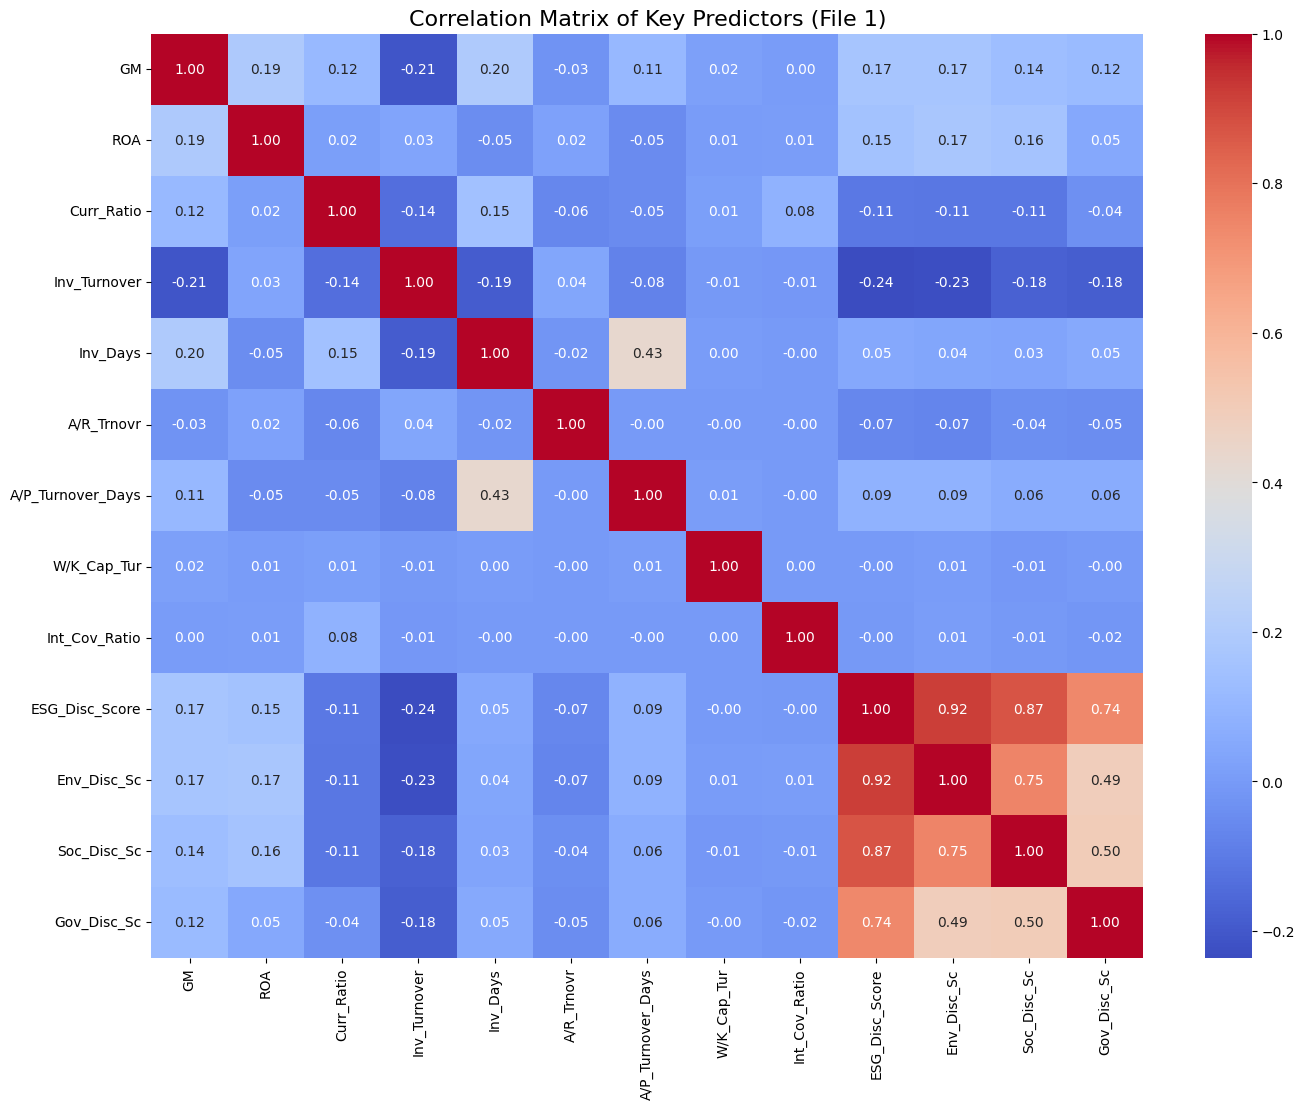


--- Correlation Heatmap for Independent Variables (File 2) ---


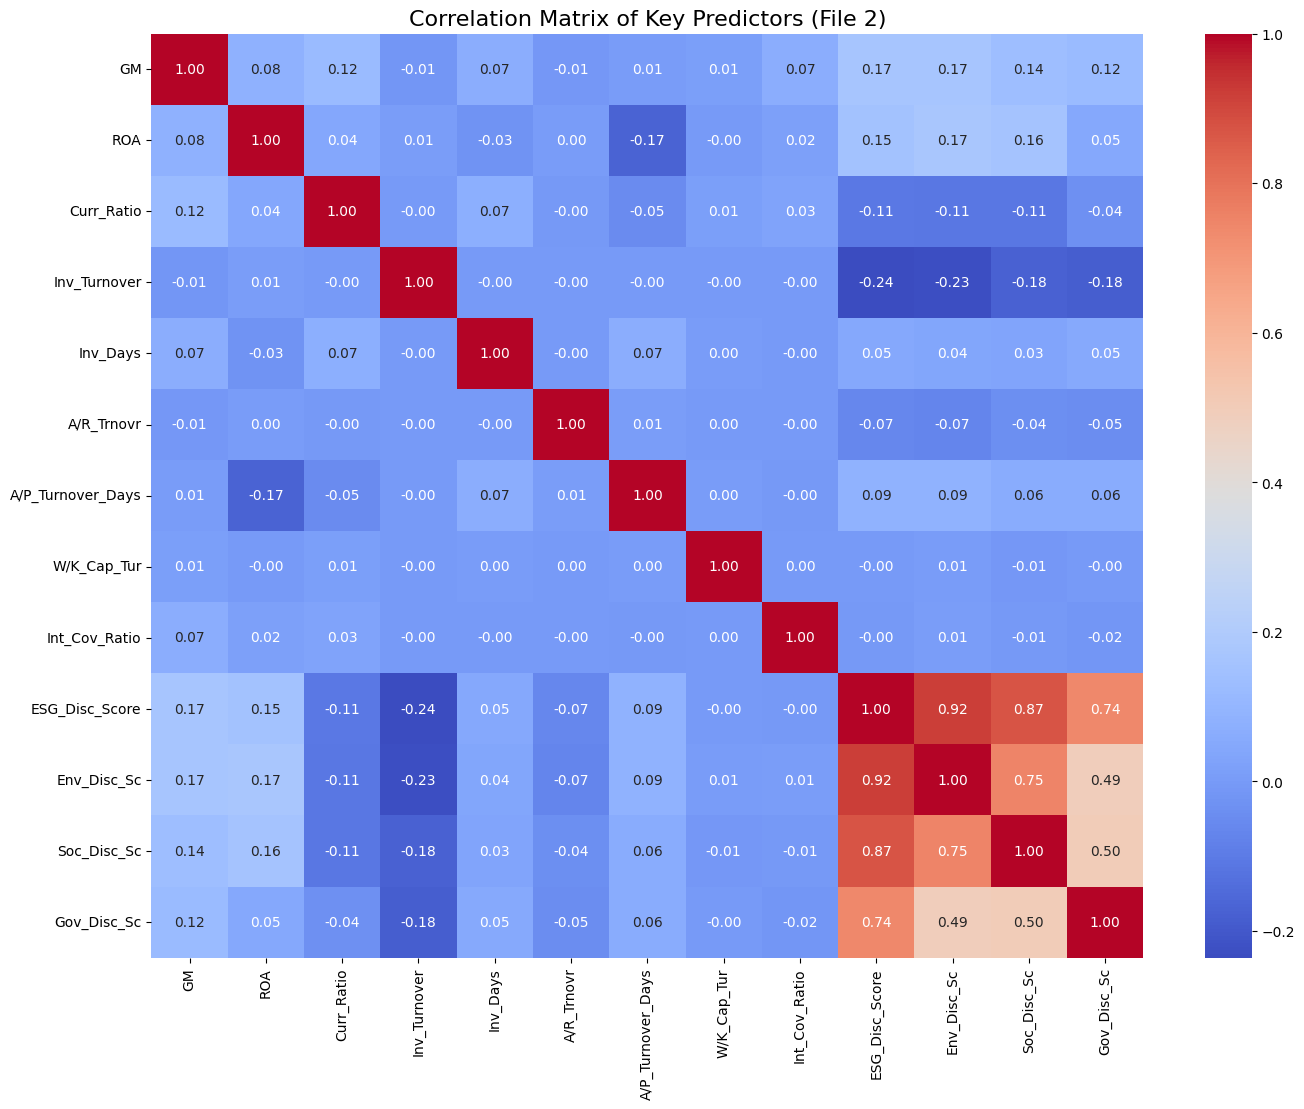

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Assume df1_final and df2_final are loaded DataFrames ---

# 1. Define the list of columns you want to drop from the analysis
cols_to_drop = [
    'Revenue', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap',
    'Avg_W/K_Cap', 'EBIT', 'Int_Exp', 'CFO', 'Tot_Debt'
]

# --- Heatmap for File 1 ---
print("--- Correlation Heatmap for Independent Variables (File 1) ---")

# 2. Create a new DataFrame for predictors by dropping specified columns
# We also drop identifiers and target variables as before
predictors1 = df1_final.drop(columns=['Company_Ticker', 'Company_Name', 'Year',
                                      'Cash_Flow_to_Debt_Ratio', 'Risk_Category', 'Country',
                                      'BICS_Industry_Group', 'BICS_Industry', 'BICS_Sub_Industry'] + cols_to_drop,
                             errors='ignore') # 'errors=ignore' prevents errors if a column doesn't exist

# 3. Calculate the correlation matrix
corr_matrix1 = predictors1.corr()

# 4. Create the heatmap
plt.figure(figsize=(16, 12)) # Adjusted size for fewer variables
sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True, fmt=".2f") # annot=True is now readable
plt.title('Correlation Matrix of Key Predictors (File 1)', fontsize=16)
plt.show()


# --- Heatmap for File 2 ---
print("\n--- Correlation Heatmap for Independent Variables (File 2) ---")

# Create the predictor DataFrame for File 2
predictors2 = df2_final.drop(columns=['Company_Ticker', 'Company_Name', 'Year',
                                      'Cash_Flow_to_Debt_Ratio', 'Risk_Category',
                                      'ESG_Disc_Score_Flag', 'Env_Disc_Sc_Flag',
                                      'Soc_Disc_Sc_Flag', 'Gov_Disc_Sc_Flag', 'Country',
                                      'BICS_Industry_Group', 'BICS_Industry', 'BICS_Sub_Industry'] + cols_to_drop,
                             errors='ignore')
corr_matrix2 = predictors2.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix2, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Key Predictors (File 2)', fontsize=16)
plt.show()

### **3. Visualisations**

--- Visualizations for File 1 (Fully Complete Data) ---


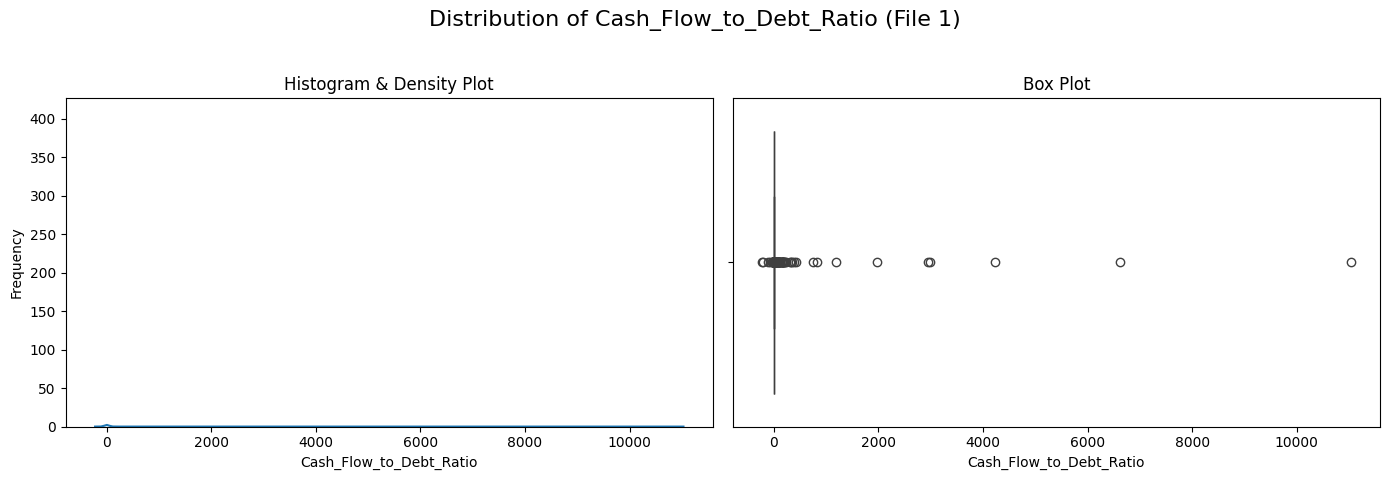

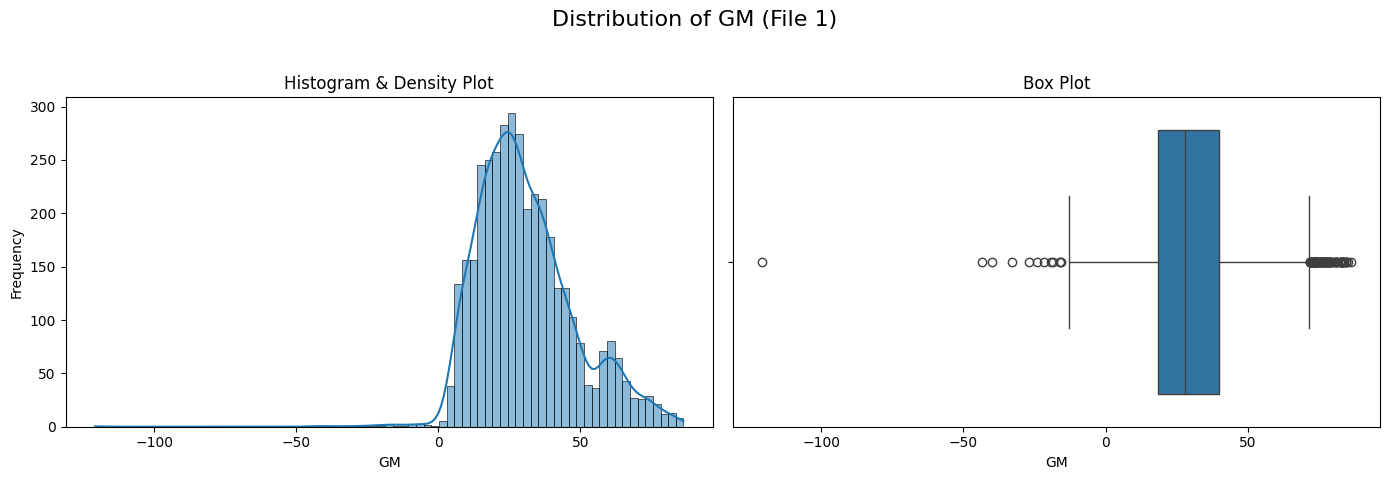

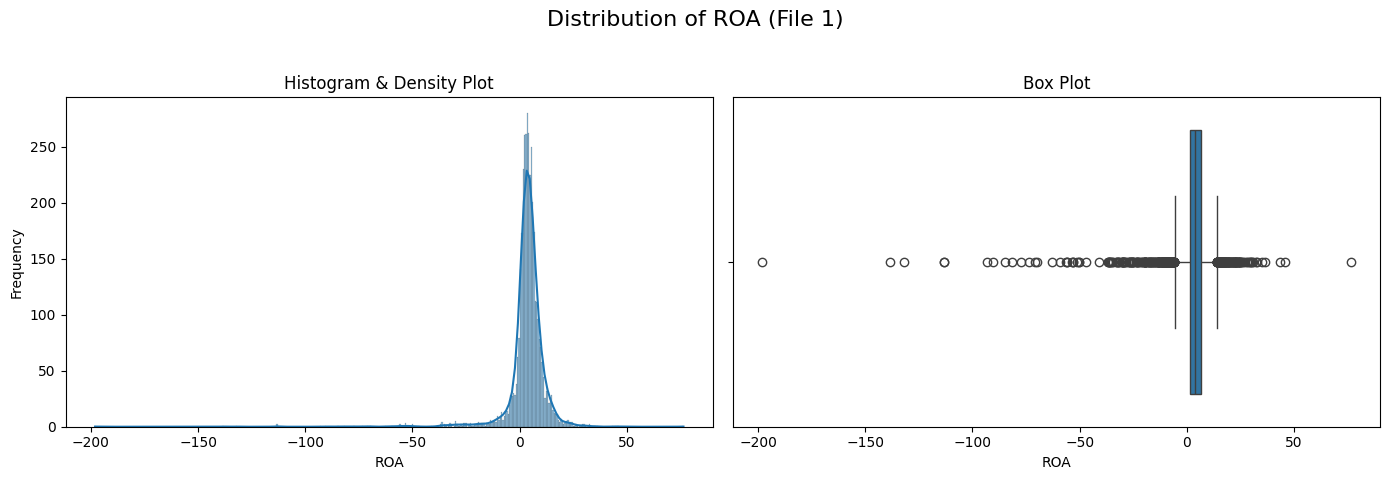

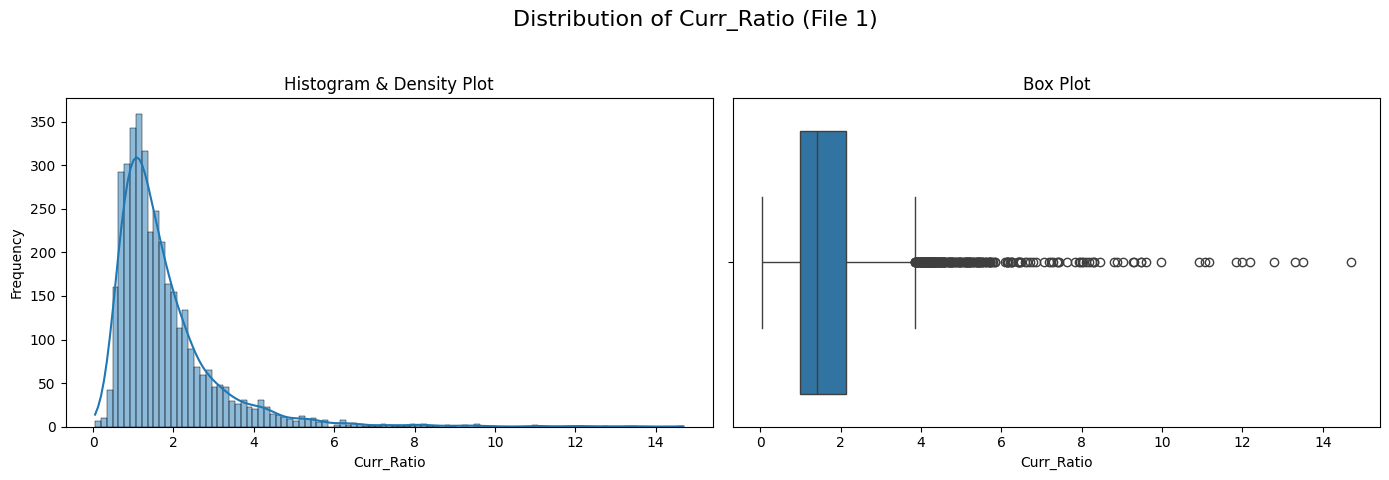

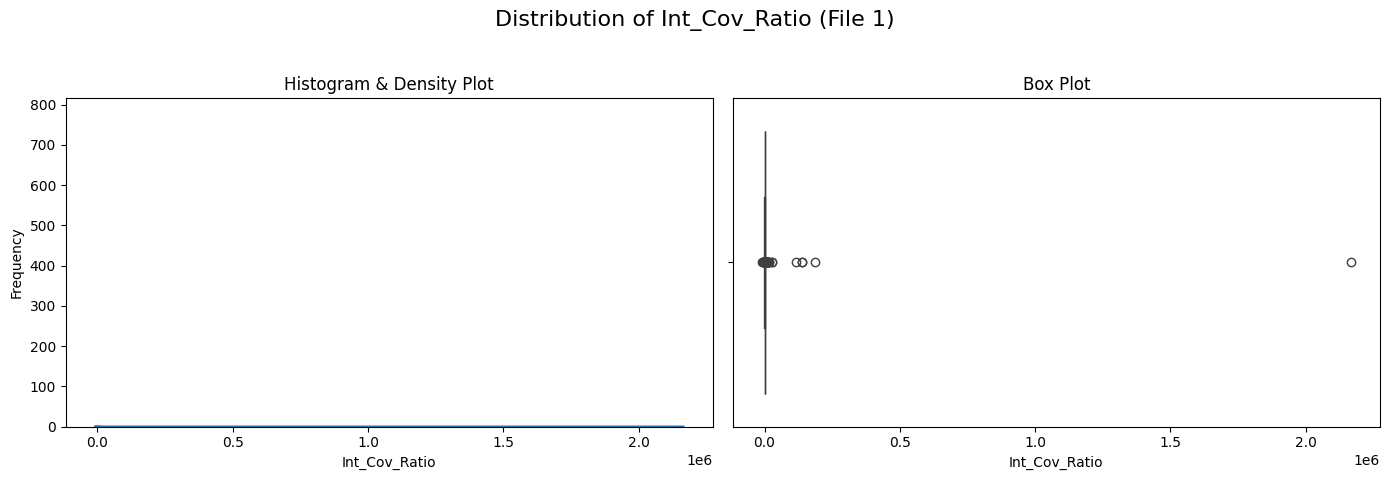

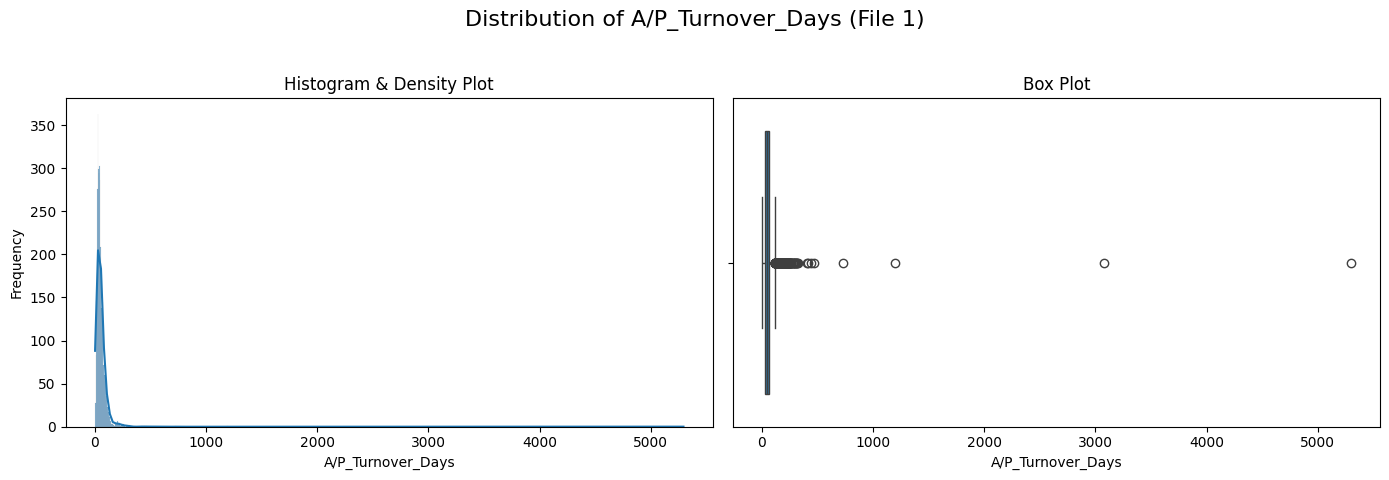

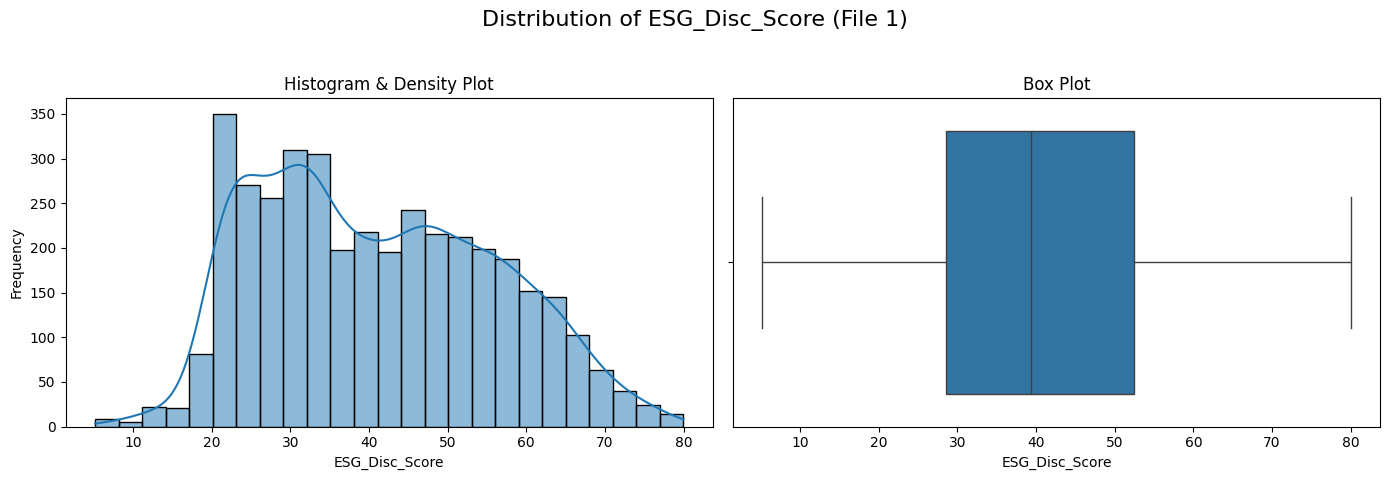


--- Visualizations for File 2 (Financially Complete Data) ---


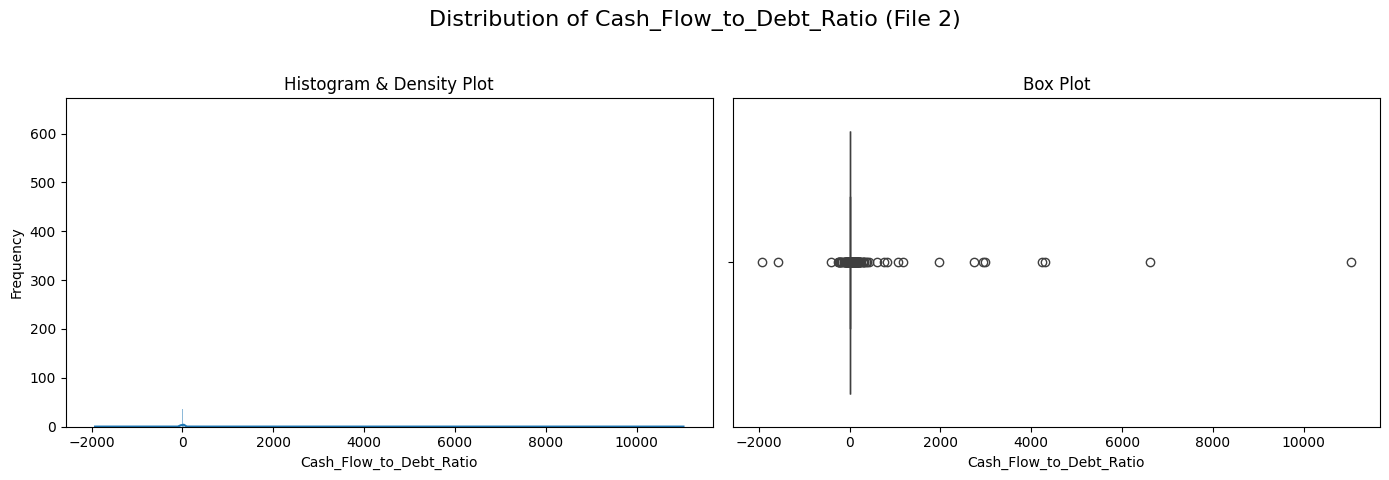

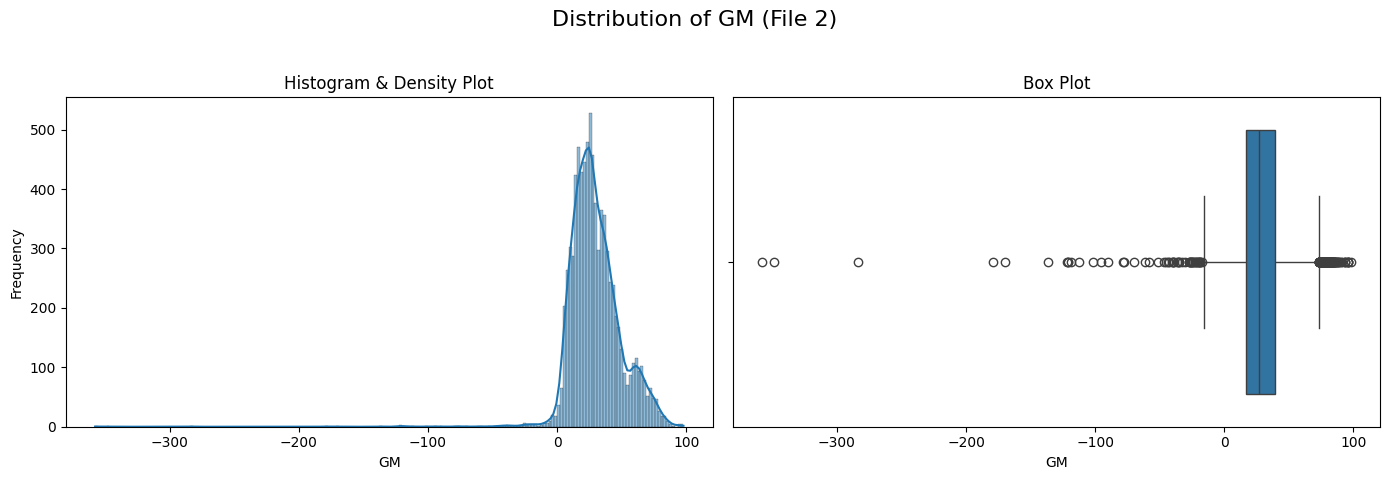

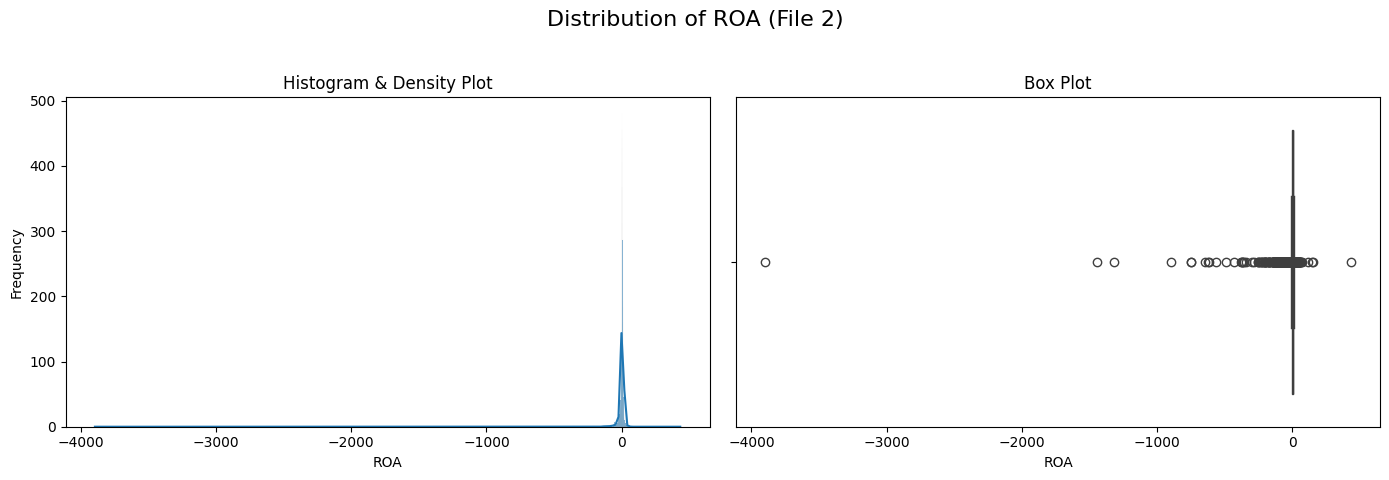

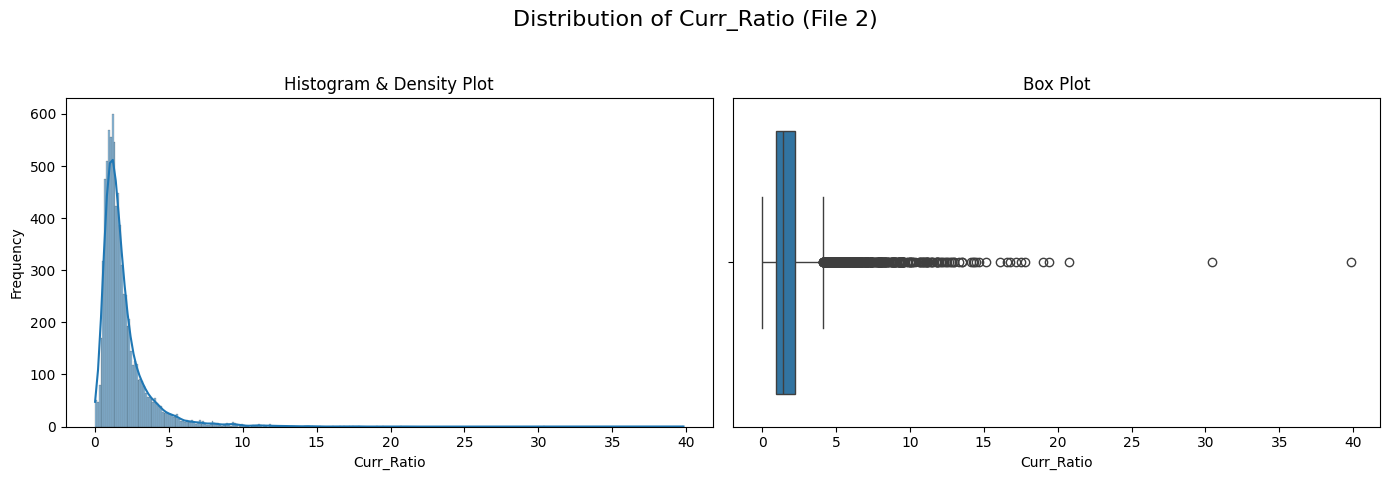

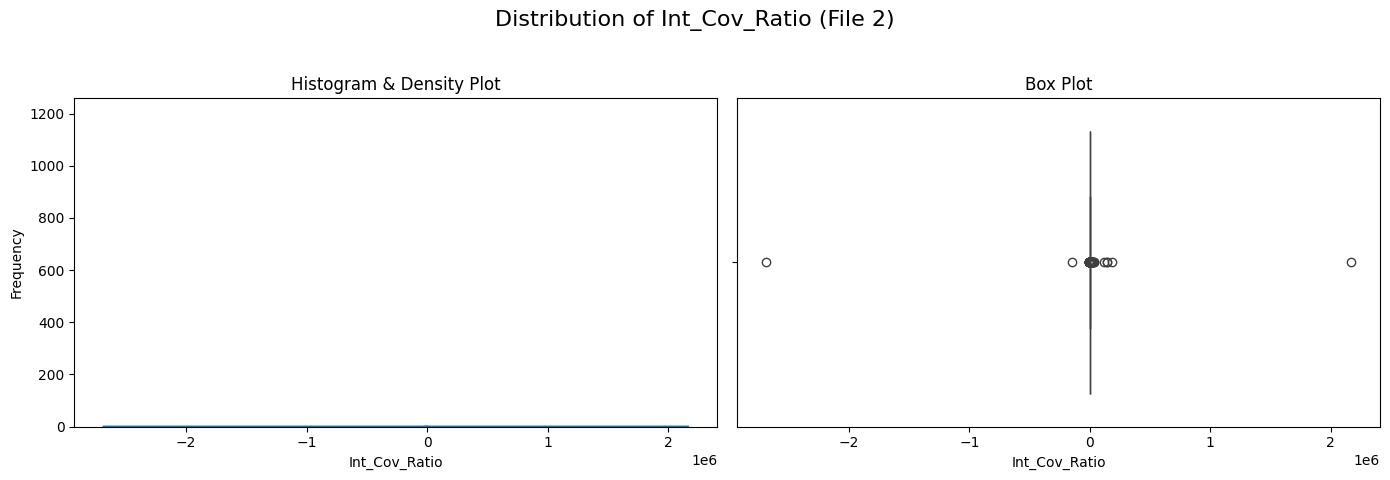

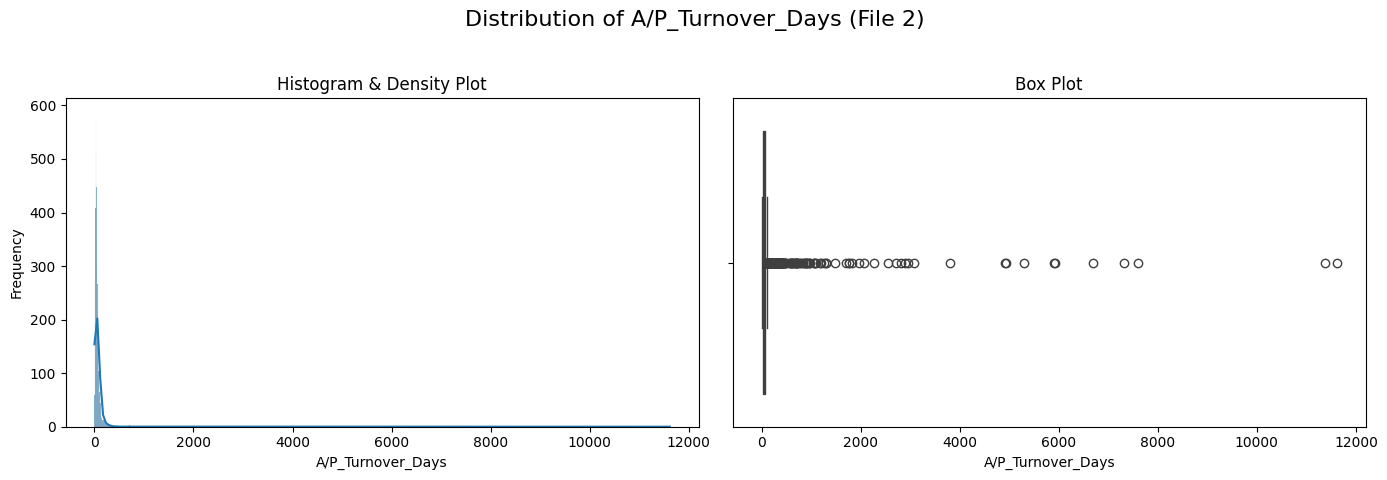

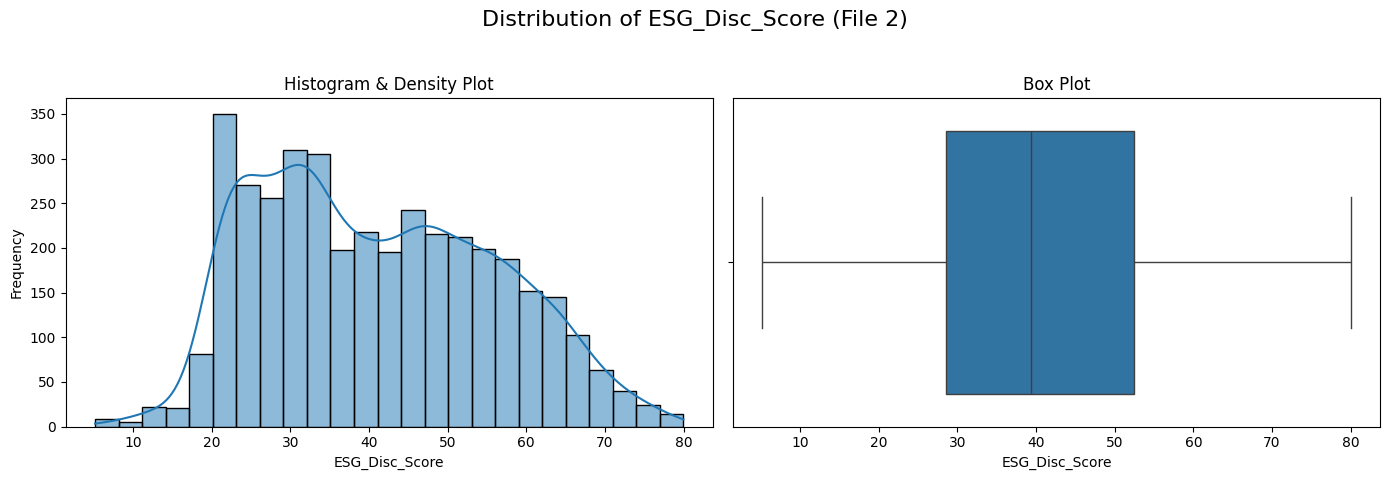

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Assume df1_final and df2_final are loaded DataFrames ---

# 1. Define the list of key variables you want to visualize
# It's best to focus on your key ratios and target variables
columns_to_visualize = [
    'Cash_Flow_to_Debt_Ratio',
    'GM',
    'ROA',
    'Curr_Ratio',
    'Int_Cov_Ratio',
    'A/P_Turnover_Days',
    'ESG_Disc_Score' # Visualize the main ESG score
]

# --- Function to create plots (to avoid repeating code) ---
def plot_distributions(df, title_suffix):
    """
    This function takes a DataFrame and a title suffix, then generates
    a histogram and box plot for each column in columns_to_visualize.
    """
    for col in columns_to_visualize:
        # Check if the column exists in the DataFrame before plotting
        if col in df.columns:
            # Create a figure with two subplots, side by side
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))
            fig.suptitle(f'Distribution of {col} ({title_suffix})', fontsize=16)

            # --- Subplot 1: Histogram with Density Plot (KDE) ---
            sns.histplot(df[col], kde=True, ax=axes[0])
            axes[0].set_title('Histogram & Density Plot')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Frequency')

            # --- Subplot 2: Box Plot ---
            sns.boxplot(x=df[col], ax=axes[1])
            axes[1].set_title('Box Plot')
            axes[1].set_xlabel(col)

            # Display the plots
            plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
            plt.show()

# --- Generate and display plots for both files ---
print("--- Visualizations for File 1 (Fully Complete Data) ---")
plot_distributions(df1_final, "File 1")

print("\n--- Visualizations for File 2 (Financially Complete Data) ---")
plot_distributions(df2_final, "File 2")